# US Baby Names Analysis

Import libraries:

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation
pd.options.display.float_format = "{:.0f}".format

## Importing and preparing data for analysis

We import CSV files. Each file groups data from an US state and contains name count information from every year from 1910 to 2022. A name can be found in the list if at least five registered babies got it in a year.
We loop over the files using glob module. Thus we import the files one by one and concatenate them.

In [2]:
filenames = glob("names_by_state\\*.txt")

In [3]:
# load dataframes to a list, and giving appropriate headers to them.
dataframes = []
for name in filenames:
    df = pd.read_csv(name, header = None, names = ["state", "gender", "year", "name", "count"])
    dataframes.append(df)

In [4]:
# concatenate dataframes
df = pd.concat(dataframes, ignore_index = True)

In [5]:
# for optimal memory usage, we make gender and state a categorical value
df.gender = df.gender.astype("category")
df.state = df.state.astype("category")

Let's take a look at the dataset

In [6]:
df.head()

state gender  year      name  count
0    AK      F  1910      Mary     14
1    AK      F  1910     Annie     12
2    AK      F  1910      Anna     10
3    AK      F  1910  Margaret      8
4    AK      F  1910     Helen      7

In [7]:
df.tail()

state gender  year      name  count
6408036    WY      M  2022      Lane      5
6408037    WY      M  2022   Michael      5
6408038    WY      M  2022  Nicholas      5
6408039    WY      M  2022     River      5
6408040    WY      M  2022     Silas      5

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408041 entries, 0 to 6408040
Data columns (total 5 columns):
 #   Column  Dtype   
---  ------  -----   
 0   state   category
 1   gender  category
 2   year    int64   
 3   name    object  
 4   count   int64   
dtypes: category(2), int64(2), object(1)
memory usage: 158.9+ MB


In [9]:
df.nunique()

state        51
gender        2
year        113
name      32722
count      4934
dtype: int64

So we have information from all 51 states from 1910 to 2022 and have a total of 32722 unique names.

In [10]:
# Save df as csv
# df.to_csv("us_baby_names_by_states.csv", index = False)

Let's create a dataframe without info on states, for simple tasks that do not need to take states into account

In [11]:
df_w_state = df.copy()
df = df.groupby(["year", "gender", "name"]).sum("count")

In [12]:
# Drop name columns with 0 count
df = df.loc[df["count"] > 0, :].reset_index()

In [13]:
df

year gender     name  count
0       1910      F    Abbie     28
1       1910      F      Ada    937
2       1910      F     Adah      5
3       1910      F  Adaline      7
4       1910      F    Addie    448
...      ...    ...      ...    ...
662135  2022      M     Zyir     32
662136  2022      M    Zyire      5
662137  2022      M     Zylo     11
662138  2022      M    Zymir    123
662139  2022      M     Zyon    232

[662140 rows x 4 columns]

## Analysis

Our goal is to examine how trends in newborn naming have evolved over the years

### A)  Most popular names from different years

First, let's take a quick look at the most popular names from couple of years. First we have to create a function:

In [14]:
def most_popular_names(year, gender, top_n):
    """
    Function for getting the top n most popular names for a chosen year and gender
    """
    names_from_year = df[(df["year"] == year)]
    most_pop = names_from_year[names_from_year["gender"] == gender].nlargest(top_n, "count")
    return most_pop[["name", "count"]]
    

In [15]:
most_popular_names(2022, "F", 10)

name  count
656537     Olivia  16573
654121       Emma  14435
653610  Charlotte  12891
652765     Amelia  12333
657207     Sophia  12310
654669   Isabella  11662
653160        Ava  11039
656174        Mia  11018
654227     Evelyn   9289
655778       Luna   8922

In [16]:
most_popular_names(1965, "F", 10)

name  count
207006      Lisa  60267
207216      Mary  34271
206725     Karen  32868
206817  Kimberly  28836
207832     Susan  26327
207452  Patricia  23554
206175     Donna  19701
206999     Linda  19340
205994   Cynthia  19245
205610    Angela  18750

In [17]:
most_popular_names(1910, "F", 10)

name  count
724       Mary  22848
448      Helen  10479
703   Margaret   8222
263    Dorothy   7314
932       Ruth   7209
65        Anna   6433
296  Elizabeth   5792
757    Mildred   5690
715      Marie   4778
28       Alice   4666

In [18]:
most_popular_names(2022, "M", 10)

name  count
660425      Liam  20456
660907      Noah  18621
660954    Oliver  15076
659687     James  12028
659049    Elijah  11979
661886   William  11282
659448     Henry  11221
660466     Lucas  10909
658348  Benjamin  10842
661650  Theodore  10754

In [19]:
most_popular_names(1965, "M", 10)

name  count
209295  Michael  81011
209017     John  71519
208526    David  67835
208967    James  67686
209533   Robert  63114
209834  William  40114
209254     Mark  38256
209516  Richard  36833
209713   Thomas  31619
208987  Jeffrey  29580

In [20]:
most_popular_names(1910, "M", 10)

name  count
1444     John  11450
1423    James   9191
1765  William   8844
1641   Robert   5609
1344   George   5441
1450   Joseph   5226
1187  Charles   4780
1327    Frank   3761
1261   Edward   3402
1377    Henry   2884

It seems most popular names went through great changes. Let's look at the situation from a wider perspective.

### B) General trends in count of babies born and name diversity per year

In [21]:
births_per_year = df.groupby("year").sum("count")

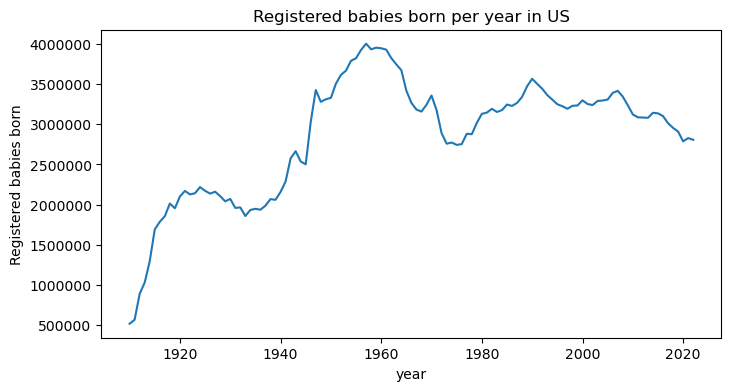

In [22]:
plt.figure(figsize = (8,4))
sns.lineplot(data = births_per_year, x = "year", y = "count")
plt.ylabel("Registered babies born")
plt.title("Registered babies born per year in US")
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.show()

In [23]:
yearly_names_count = df.groupby("year")["name"].count().reset_index()

Now let's take a look at how many different names were used throughout the years.

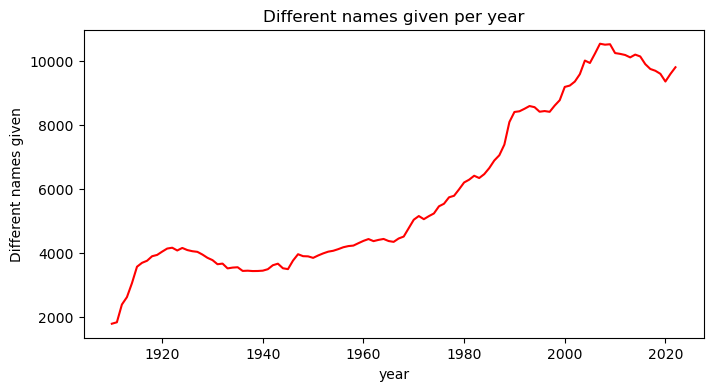

In [24]:
plt.figure(figsize = (8,4))
sns.lineplot(data = yearly_names_count, x = "year", y = "name", color = "red")
plt.ylabel("Different names given")
plt.title("Different names given per year")
plt.show()

It seems despite registered babies count didn't really grow 1960, parents started to choose from way more names.

### C) Most used names of all times

First, let's create a summarization table for names.

In [25]:
summarization = df.groupby(["name", "gender"]).agg(total_count = ("count", "sum"),
                                                           first_occurence = ("year", "min"),
                                                           last_occurence = ("year", "max"),
                                                            min_times_used = ("count", "min"),
                                                           max_times_used = ("count", "max")).dropna().reset_index()
summarization

name gender  total_count  first_occurence  last_occurence  \
0         Aaban      M           12             2013            2014   
1         Aadam      M            6             2019            2019   
2         Aadan      M           23             2008            2014   
3       Aadarsh      M           11             2009            2019   
4         Aaden      M         4174             2005            2020   
...         ...    ...          ...              ...             ...   
35901     Zyria      F           81             1998            2014   
35902    Zyriah      F           63             2006            2016   
35903     Zyron      M            5             2015            2015   
35904     Zyrus      M            5             2021            2021   
35905  Zyshonne      M            5             1998            1998   

       min_times_used  max_times_used  
0                   6               6  
1                   6               6  
2                   5              12  
3                   5               6  
4                   5            1243  
...               ...             ...  
35901               5              20  
35902               5              13  
35903               5               5  
35904               5               5  
35905               5               5  

[35906 rows x 7 columns]

Let's check for every names which year were they on the peak of popularity

In [26]:
# Create function to be used in apply
def peak_popularity_year(group):
    return group.nlargest(1, "count")["year"]

In [27]:
peak_popularity = df.groupby(["name", "gender"]).apply(peak_popularity_year).reset_index().drop("level_2", axis = 1)

In [28]:
# Add peak_popularity year to the summarization
summarization["peak_popularity"] = peak_popularity["year"]
summarization

name gender  total_count  first_occurence  last_occurence  \
0         Aaban      M           12             2013            2014   
1         Aadam      M            6             2019            2019   
2         Aadan      M           23             2008            2014   
3       Aadarsh      M           11             2009            2019   
4         Aaden      M         4174             2005            2020   
...         ...    ...          ...              ...             ...   
35901     Zyria      F           81             1998            2014   
35902    Zyriah      F           63             2006            2016   
35903     Zyron      M            5             2015            2015   
35904     Zyrus      M            5             2021            2021   
35905  Zyshonne      M            5             1998            1998   

       min_times_used  max_times_used  peak_popularity  
0                   6               6             2013  
1                   6               6             2019  
2                   5              12             2008  
3                   5               6             2019  
4                   5            1243             2009  
...               ...             ...              ...  
35901               5              20             2008  
35902               5              13             2007  
35903               5               5             2015  
35904               5               5             2021  
35905               5               5             1998  

[35906 rows x 8 columns]

Let's check the first 10 most used female and male names all time

In [29]:
most_used_females = summarization.loc[summarization["gender"] == "F"].nlargest(10, "total_count")
most_used_females

name gender  total_count  first_occurence  last_occurence  \
22955       Mary      F      3750176             1910            2022   
26456   Patricia      F      1569827             1910            2022   
10213  Elizabeth      F      1567481             1910            2022   
15848   Jennifer      F      1468828             1932            2022   
20966      Linda      F      1449173             1910            2022   
4028     Barbara      F      1425319             1910            2022   
22483   Margaret      F      1139763             1910            2022   
31452      Susan      F      1110137             1910            2022   
9472     Dorothy      F      1055694             1910            2022   
16066    Jessica      F      1046443             1910            2022   

       min_times_used  max_times_used  peak_popularity  
22955            2075           73984             1921  
26456             158           56446             1951  
10213            5792           20749             1990  
15848               5           63602             1972  
20966              79           99693             1947  
4028              223           48798             1947  
22483            1680           28468             1921  
31452             146           47418             1955  
9472              179           39996             1924  
16066               6           55996             1987

In [30]:
most_used_males = summarization.loc[summarization["gender"] == "M"].nlargest(10, "total_count")
most_used_males

name gender  total_count  first_occurence  last_occurence  \
14897    James      M      5047892             1910            2022   
16407     John      M      4903223             1910            2022   
28121   Robert      M      4752021             1910            2022   
23761  Michael      M      4388166             1910            2022   
34410  William      M      3941043             1910            2022   
8180     David      M      3631127             1910            2022   
16662   Joseph      M      2556791             1910            2022   
27950  Richard      M      2547264             1910            2022   
6293   Charles      M      2297858             1910            2022   
32572   Thomas      M      2271587             1910            2022   

       min_times_used  max_times_used  peak_popularity  
14897            9191           94758             1947  
16407            7930           88319             1947  
28121            4051           91650             1947  
23761             795           92785             1957  
34410            8844           66993             1947  
8180             1243           86304             1955  
16662            5226           32746             1956  
27950            1643           58868             1946  
6293             4780           40773             1947  
32572            2842           48646             1952

These tables show the most used names of all time. But is it a good metric for expressing a name's popularity? It would be interesting to make a new metric: relative frequency for a name in a year. Relative frequency should be expressed as "how many times were a name chosen out of 1 000 000 names of the same gender"

In [31]:
df["relative_frequency"] = df["count"].div(df.groupby(["year", "gender"])["count"].transform("sum"))*1000000

It would be a bit hard to compare only be relative frequency. Let's give each name a popularity rank for each year.

In [32]:
df["popularity_rank"] = df.groupby(["year", "gender"], group_keys = False)["count"].apply(lambda x: x.rank(ascending = False))

In [33]:
df.head(10)

year gender      name  count  relative_frequency  popularity_rank
0  1910      F     Abbie     28                  80              525
1  1910      F       Ada    937                2661               94
2  1910      F      Adah      5                  14             1004
3  1910      F   Adaline      7                  20              841
4  1910      F     Addie    448                1272              157
5  1910      F     Adela     22                  62              569
6  1910      F  Adelaide    152                 432              278
7  1910      F     Adele    241                 684              224
8  1910      F    Adelia      5                  14             1004
9  1910      F   Adelina     12                  34              690

### D) How the most used names performed throughout the years?

Let's check how some of the most popular names performed from 1910 to 2022

In [34]:
def plot_name_trend(name, gender):
    data = df.loc[(df["name"] == name) & (df["gender"] == gender)]
    
    fig, ax1 = plt.subplots(figsize = (5,3))
    fig.suptitle(f"Popularity of {name}")
    ax1.plot(data["year"], data["popularity_rank"], color = "red", label = "Popularity rank")
    ax2 = ax1.twinx()
    ax2.plot(data["year"], data["relative_frequency"], color = "green", label = "Relative frequency")
    ax1.set_ylabel("Popularity rank")
    ax2.set_ylabel("Relative frequency (Babies per million)")
    ax1.set_xlabel("Year")
    ax1.legend(loc = 2)
    ax2.legend(loc = 1)
    plt.show();

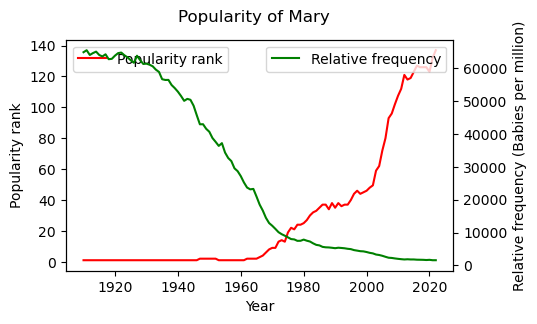

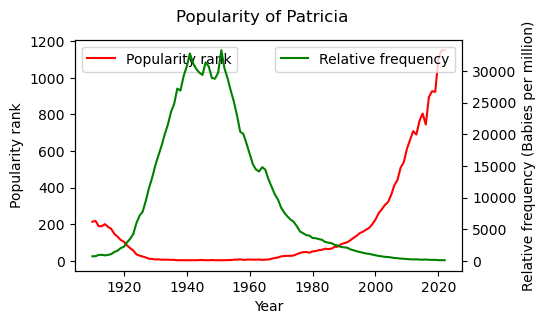

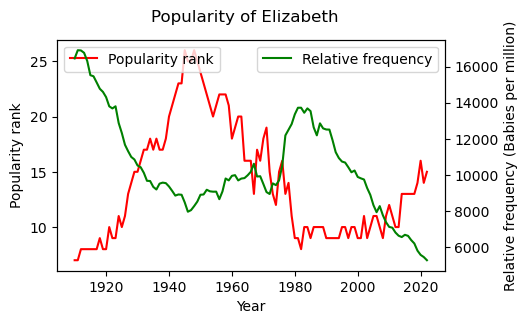

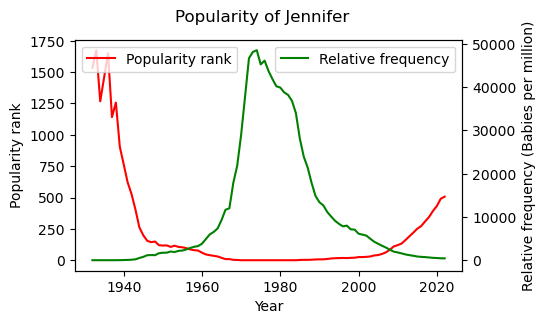

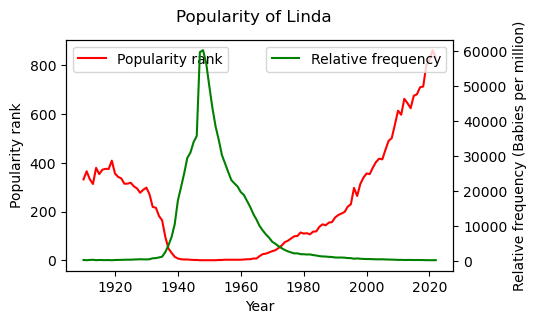

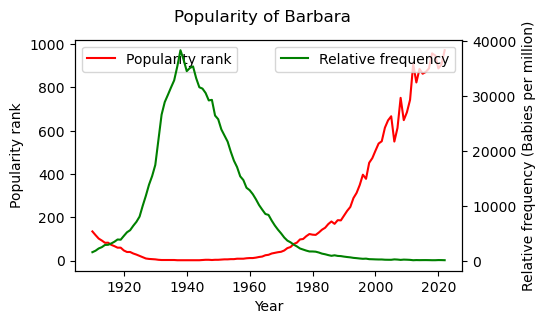

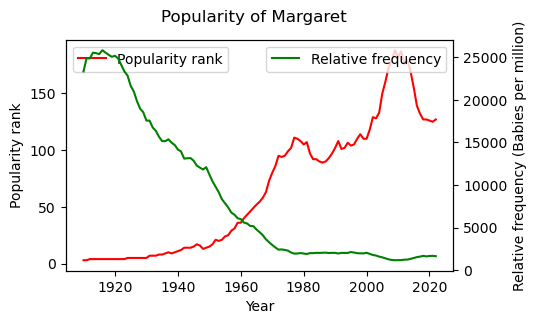

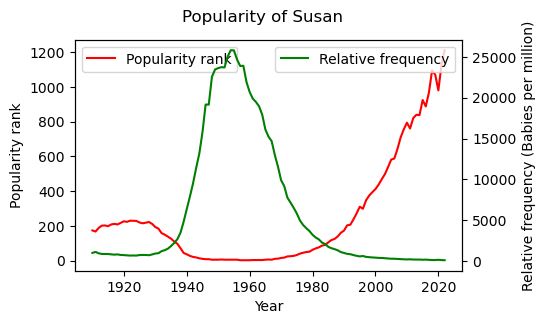

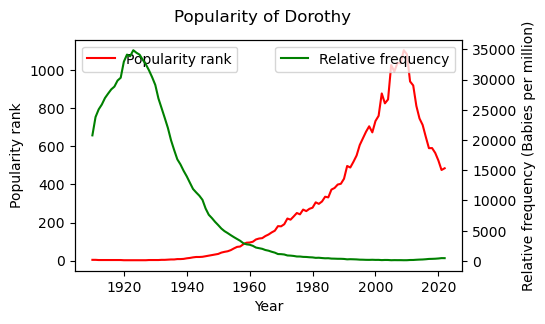

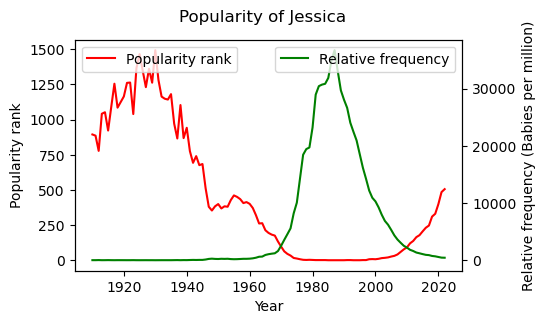

In [35]:
for name in most_used_females["name"]:
       plot_name_trend(name, "F")

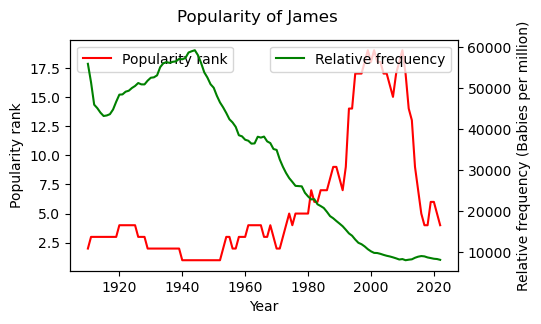

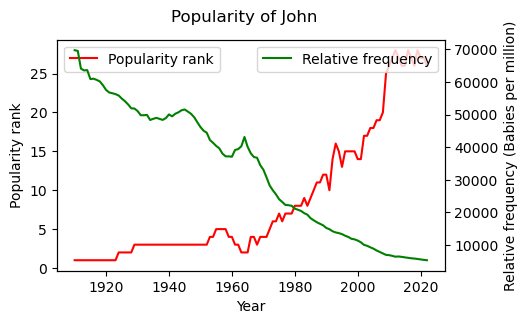

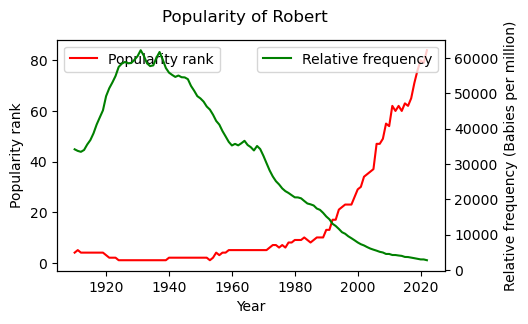

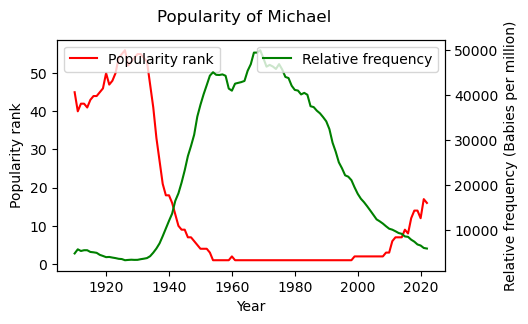

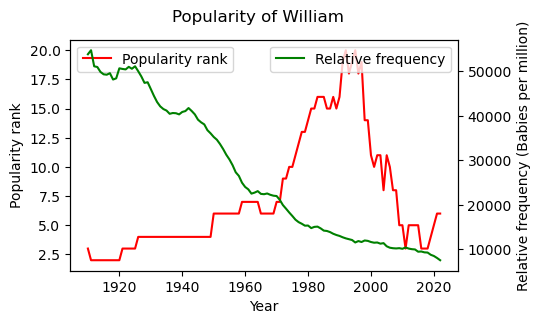

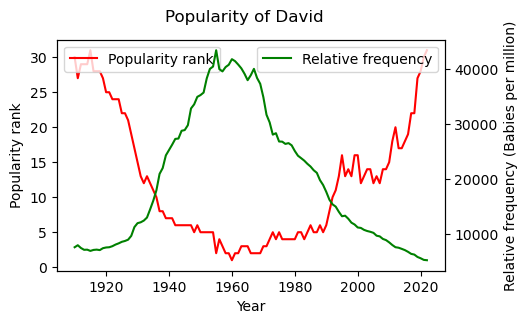

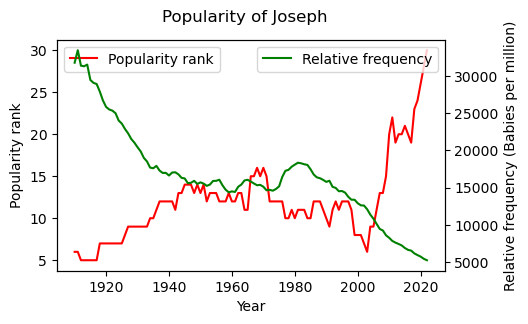

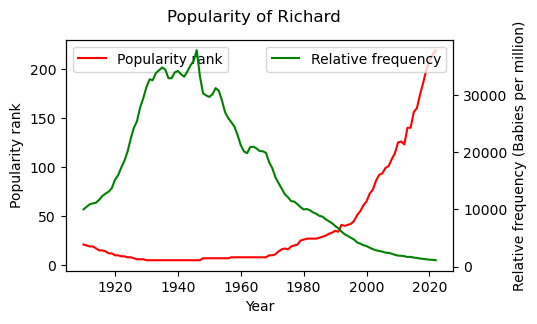

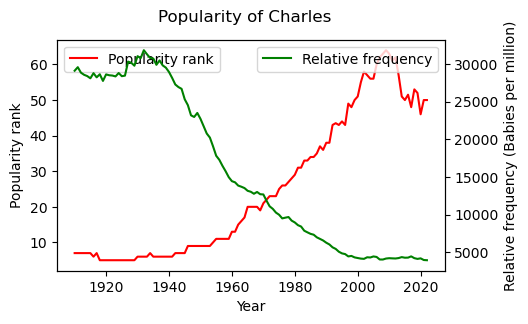

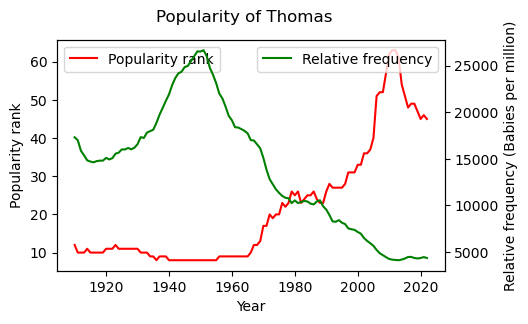

In [36]:
for name in most_used_males["name"]:
       plot_name_trend(name, "M")

We can see very interesting trends in several names. Some of them are easily followable, like Patricia, which has a long peak period and a steady decline. But there are several names which have reoccuring popularity booms. Or just one really high peak or fall.
We'd like to discover more names with extremely high changes in their popularity.
For this effort, we calculate how a name's relative frequency changes in particular year compared to the previous year.

### E) Biggest hypes in name selection

Let's examine the biggest peaks and dropdowns in naming trends. First let's calculate the yearly change in realitve freqency!

In [37]:
# Shift all rel_freq rows down to get prev_year
df["prev_year_rel_freq"] = df.groupby(["name", "gender"])["relative_frequency"].shift()
# Set NaNs to 0 for after 1910. 
df.loc[(df["year"] > 1910) & df["prev_year_rel_freq"].isna(), "prev_year_rel_freq"] = 0

In [38]:
# Substract to make rel_freq_difference
df["rel_freq_difference"] = df["prev_year_rel_freq"] - df["relative_frequency"]
# Let's see if it worked
df.loc[df["name"] == "Mary"].tail(10)

year gender  name  count  relative_frequency  popularity_rank  \
568132  2013      F  Mary   2654                1861              118   
578255  2014      F  Mary   2632                1802              119   
588398  2015      F  Mary   2628                1801              123   
598383  2016      F  Mary   2506                1732              127   
608176  2017      F  Mary   2410                1714              126   
617851  2018      F  Mary   2340                1691              126   
627499  2019      F  Mary   2224                1633              126   
637003  2020      F  Mary   2206                1689              123   
646430  2021      F  Mary   2085                1571              132   
656059  2022      F  Mary   2075                1573              137   

        prev_year_rel_freq  rel_freq_difference  
568132                1801                  -60  
578255                1861                   58  
588398                1802                    1  
598383                1801                   70  
608176                1732                   18  
617851                1714                   22  
627499                1691                   58  
637003                1633                  -57  
646430                1689                  119  
656059                1571                   -2

Let's see the biggest changes in relative frequency

In [39]:
# Females
most_hyped_females = df.loc[df["gender"] == "F"].nlargest(15, "rel_freq_difference").drop_duplicates(subset=['name'])
most_hyped_females

year gender      name  count  relative_frequency  popularity_rank  \
97435   1937      F   Shirley  26823               27218                4   
143951  1950      F     Linda  80431               49957                1   
315087  1985      F  Jennifer  42657               28099                3   
229618  1970      F      Lisa  38964               24485                2   
171341  1957      F   Deborah  40089               20826                6   
264560  1977      F       Amy  26731               19830                3   
358607  1991      F  Brittany  29090               17844                3   
175477  1958      F   Cynthia  31008               16404                8   
334446  1988      F    Ashley  49972               32059                2   

        prev_year_rel_freq  rel_freq_difference  
97435                36500                 9281  
143951               56580                 6623  
315087               33982                 5884  
229618               29226                 4741  
171341               25325                 4498  
264560               24315                 4484  
358607               22038                 4194  
175477               20440                 4037  
334446               35939                 3880

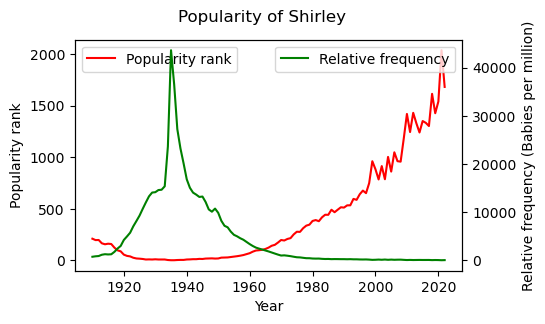

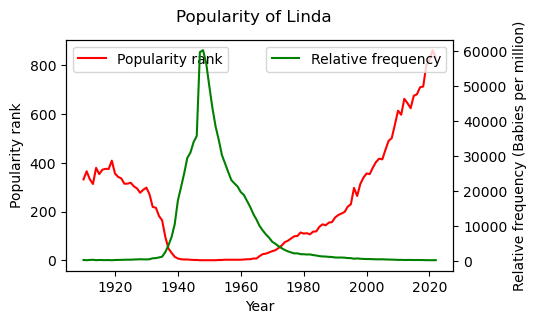

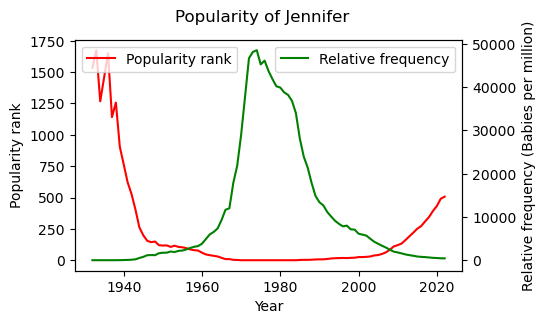

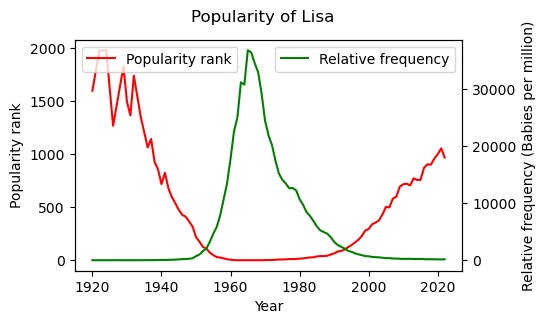

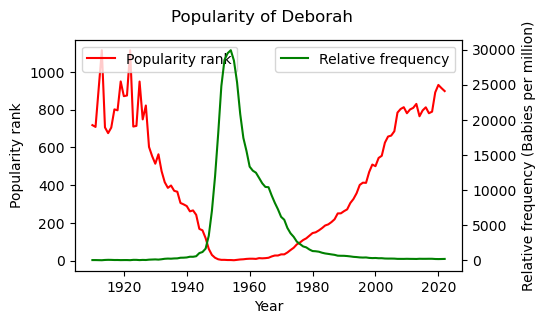

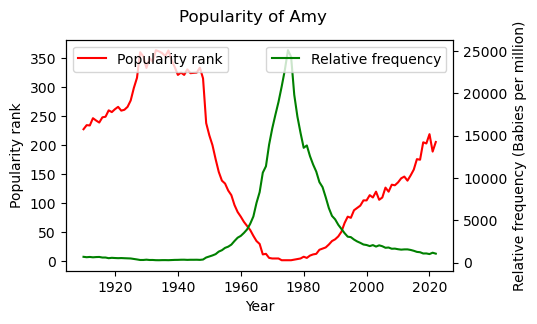

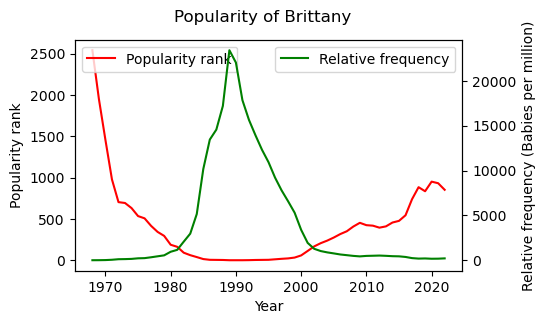

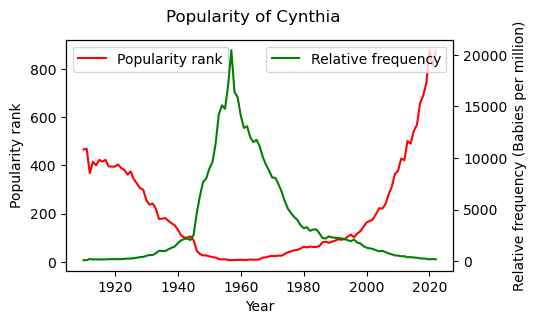

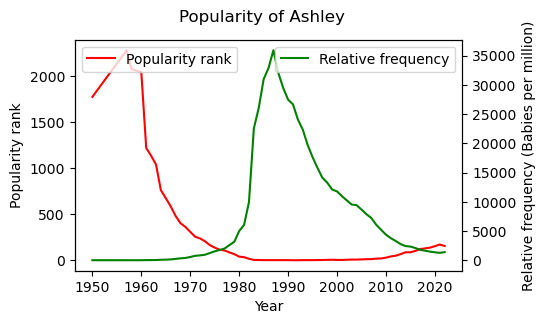

In [40]:
for name in most_hyped_females["name"]:
       plot_name_trend(name, "F")

In [41]:
# Males
most_hyped_males = df.loc[df["gender"] == "M"].nlargest(15, "rel_freq_difference").drop_duplicates(subset=['name'])

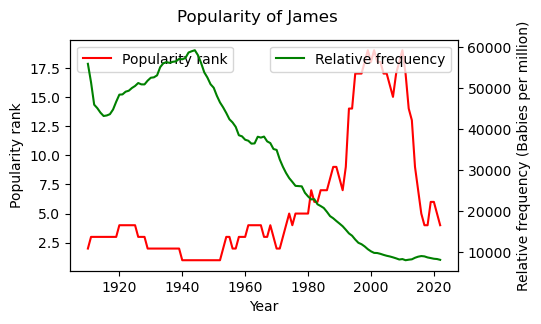

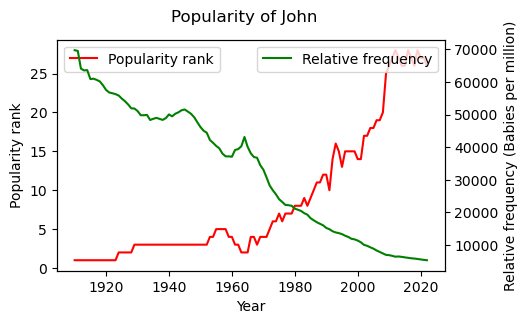

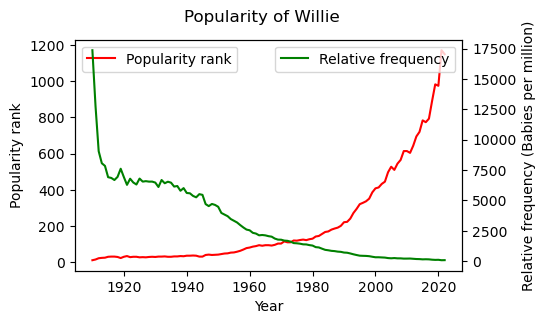

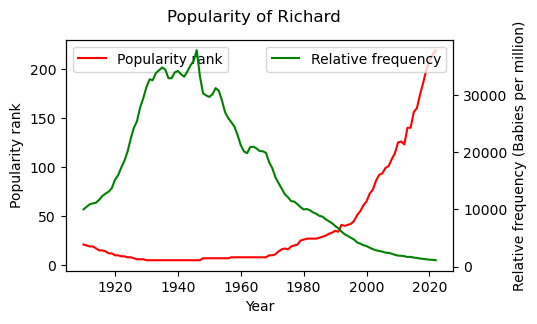

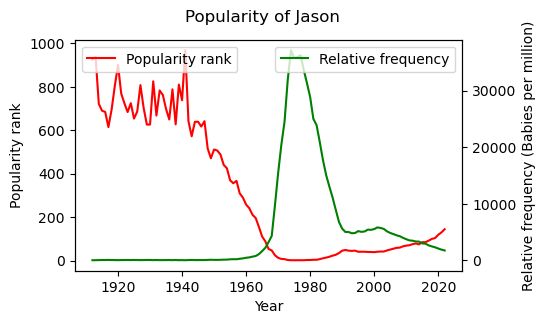

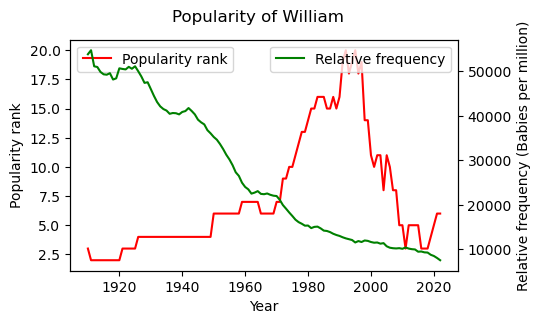

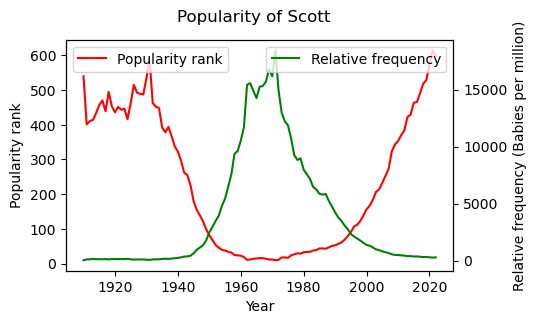

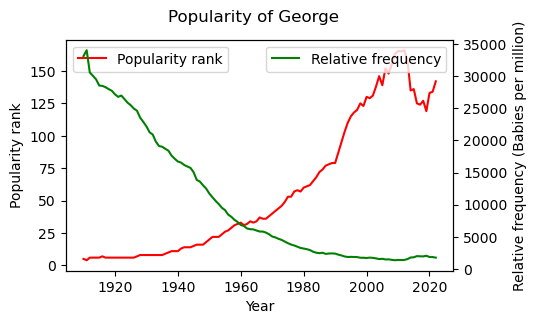

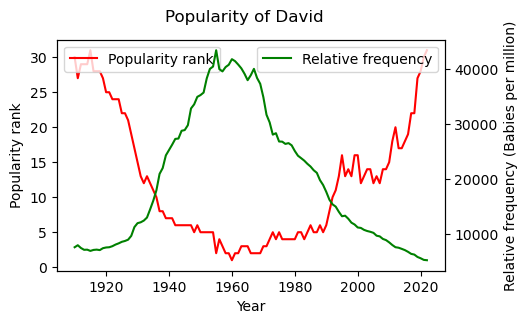

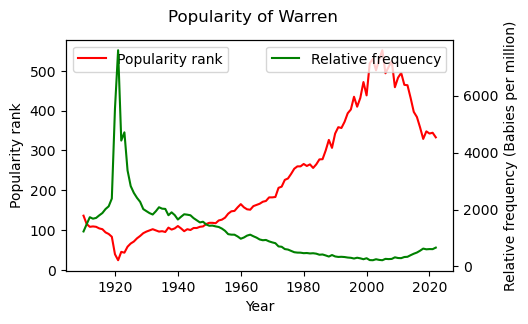

In [42]:
for name in most_hyped_males["name"]:
       plot_name_trend(name, "M")

These sure are high peaks in relative frequency! Wonder why did they happen?
I researched some of them:
- Ashley become popular in the 80s mainly because the introduction the character of Ashley Abbot in the soap opera The Young and The Restless
- Deborah rise in popularity in the 50s due to acrtresses Deborah Kerr and Debra Paget
- Acrtress Jennifer Jones contributed to the historical boom of the name's popularity
- Actor Jason King probably is the culprit behind the name's rapid rise of popularity

And so on. Actors, actresses, politicans, athletes have probably the most influence over naming trends.

### F) Names with balanced popularity

We see the most used and most hyped names of all time. It is time to chech which names are the most balanced in terms of usage.
A balanced popularity means small standard deviation in relative fequency.
We want to focus on relatively popular names, so we'll include average popularity rank, and choose to examine only high ranking names.

In [43]:
# calculate std of relative frequency
balance_check = df.groupby(["name", "gender"])["relative_frequency"].std(ddof=0).reset_index().rename(columns={'relative_frequency' : 'std_of_rel_freq'})
# calculate mean of popularity rank
insert_mean = df.groupby(["name", "gender"])["popularity_rank"].mean().reset_index()
# combine and clean
balance_check["mean_of_popularity_rank"] = insert_mean["popularity_rank"]
balance_check.dropna(inplace = True)
balance_check

name gender  std_of_rel_freq  mean_of_popularity_rank
1         Aaban      M                0                     3620
3         Aadam      M                0                     3532
5         Aadan      M                2                     3552
7       Aadarsh      M                1                     3858
9         Aaden      M              191                     1215
...         ...    ...              ...                      ...
65434     Zyria      F                3                     4444
65436    Zyriah      F                2                     4714
65439     Zyron      M                0                     4106
65441     Zyrus      M                0                     3968
65443  Zyshonne      M                0                     3422

[35906 rows x 4 columns]

Let's check the female and male names with the smallest standard deviation in relative frequency with at most of an average rank of 100

In [44]:
balanced_females = balance_check.loc[(balance_check["mean_of_popularity_rank"] <= 100) & (balance_check["gender"] == "F")].nsmallest(10, "std_of_rel_freq")

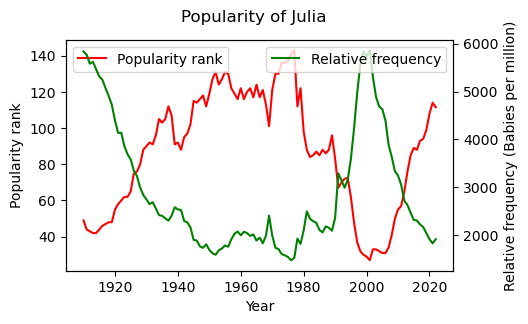

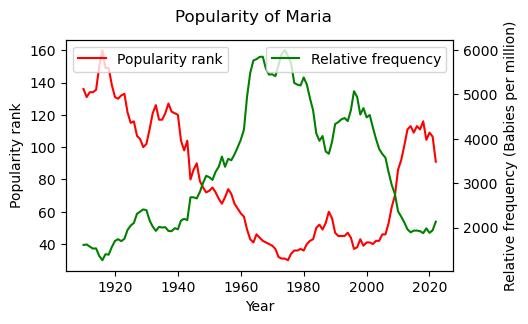

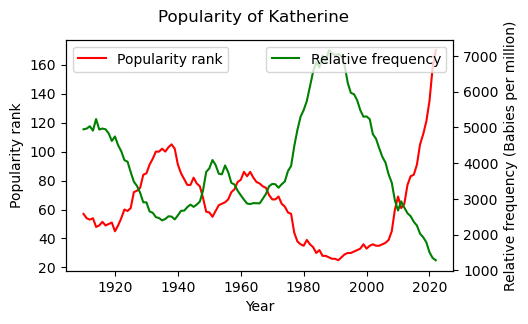

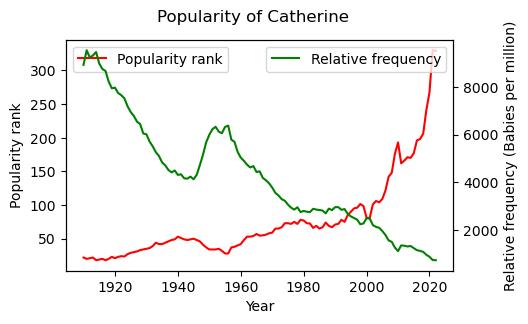

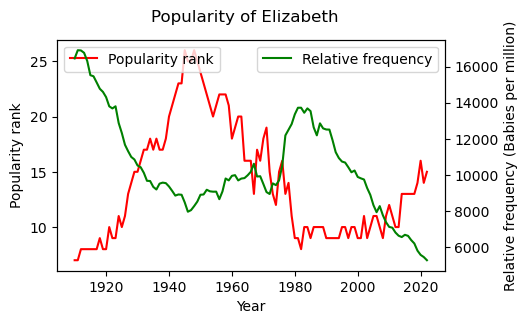

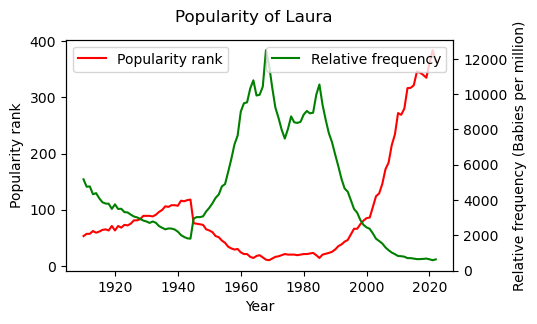

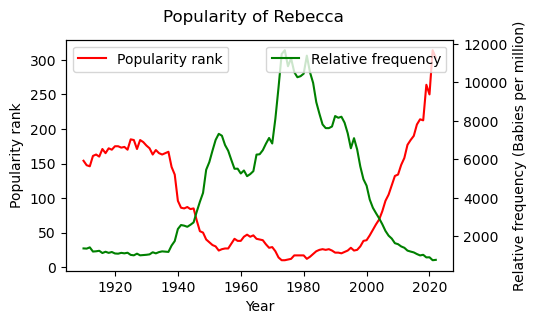

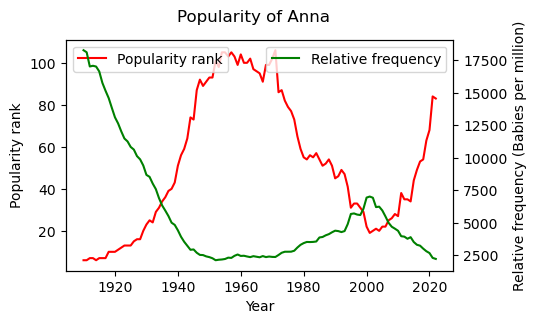

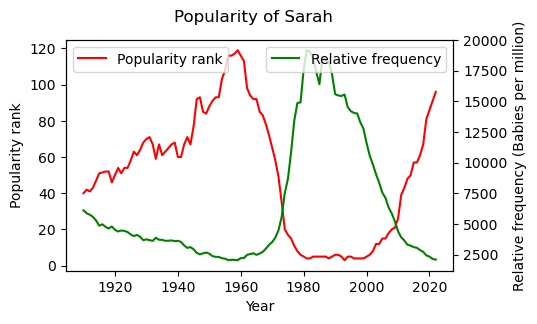

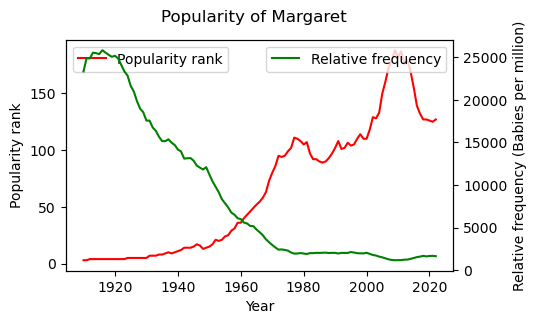

In [45]:
for name in balanced_females["name"]:
       plot_name_trend(name, "F")

In [46]:
balanced_males = balance_check.loc[(balance_check["mean_of_popularity_rank"] <= 100) & (balance_check["gender"] == "M")].nsmallest(10, "std_of_rel_freq")

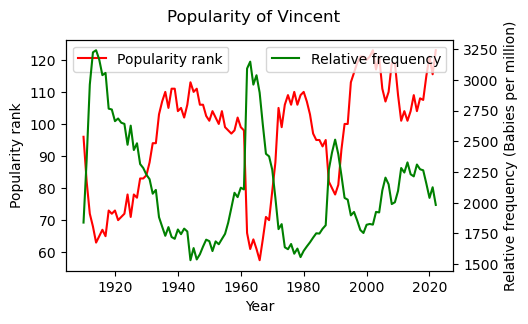

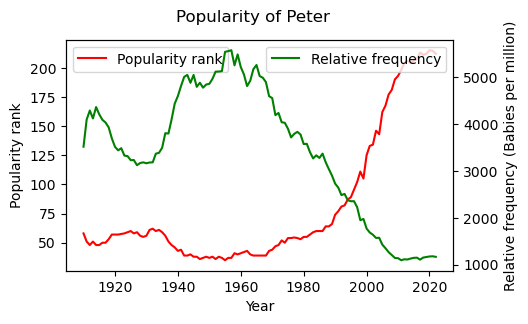

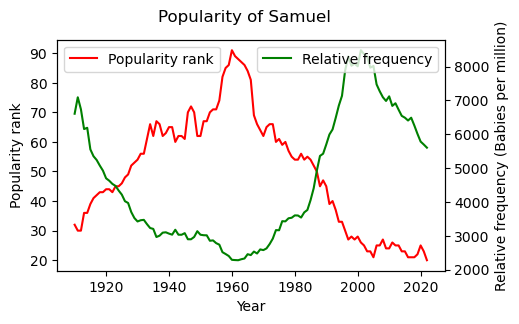

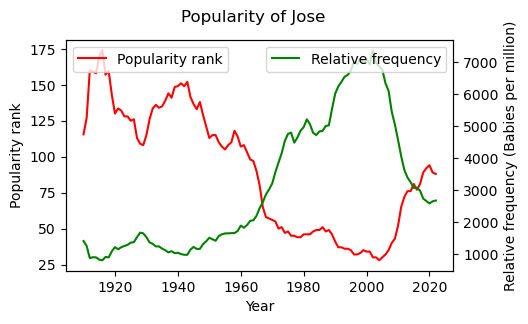

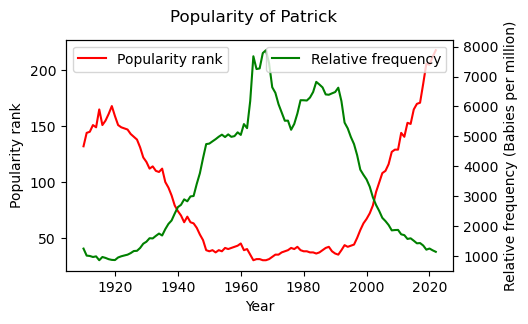

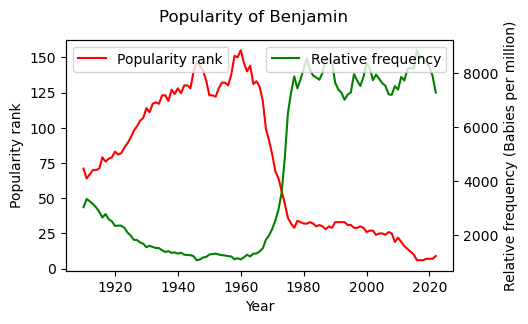

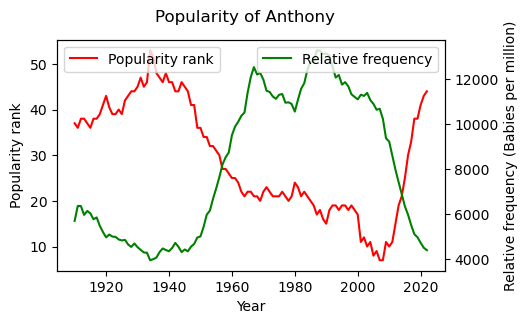

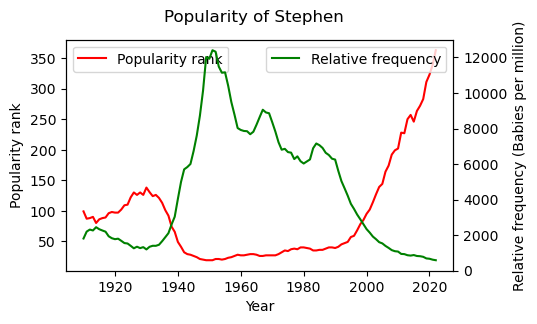

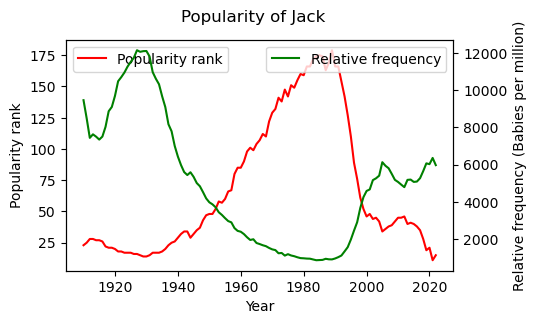

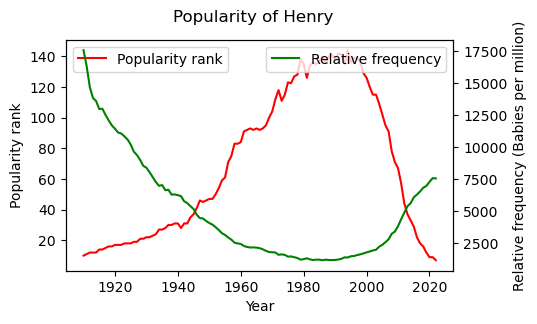

In [47]:
for name in balanced_males["name"]:
       plot_name_trend(name, "M")

It would be hard to say that any name was really persistent in popularity rating for the last 110 years. But these have some of the most balanced usage. 

### E) Most popular names in different states

Finally let's check look at how naming trends compare in different states.
First, let's use our original dataframe with state info. And add the metric popularity_rank to it.

In [48]:
df_w_state["popularity_rank"] = df_w_state.groupby(["year", "state", "gender"], group_keys = False)["count"].apply(lambda x: x.rank(ascending = False))
df_w_state

state gender  year      name  count  popularity_rank
0          AK      F  1910      Mary     14                1
1          AK      F  1910     Annie     12                2
2          AK      F  1910      Anna     10                3
3          AK      F  1910  Margaret      8                4
4          AK      F  1910     Helen      7                5
...       ...    ...   ...       ...    ...              ...
6408036    WY      M  2022      Lane      5              110
6408037    WY      M  2022   Michael      5              110
6408038    WY      M  2022  Nicholas      5              110
6408039    WY      M  2022     River      5              110
6408040    WY      M  2022     Silas      5              110

[6408041 rows x 6 columns]

Let's create a function for plotting popularity ranks of a chosen name in a chosen year throughout the states.

In [49]:
def plot_pop_rank_in_states(year, name, gender):
    fig = px.choropleth(df_w_state.loc[(df_w_state["year"] == year) & (df_w_state["name"] == name) & (df_w_state["gender"] == gender)],
                        locations='state', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='popularity_rank',
                        color_continuous_scale="Viridis_r", 
                        )
    fig.show()

Let's check Mary in 1930 for example

In [50]:
plot_pop_rank_in_states(1930, "Mary", "F")

Then let's create a function that plots the most popular names in each state for a chosen year

In [51]:
# Plotpy has limitations for marking categorical values properly, so we put some placeholder at the end of the dataset.
for i in range(7):
    df_w_state.loc[len(df_w_state.index) + i] = [f"NO{i}", "F", 1910, "."*i, 0, 1]
for i in range(9):
    df_w_state.loc[len(df_w_state.index) + i] = [f"NO{i}", "M", 1910, "."*i, 0, 1]

In [52]:
def most_pop_name_in_states(gender):
    fig = px.choropleth(df_w_state.loc[(df_w_state["popularity_rank"] == 1) & (df_w_state["gender"] == gender)],
                        locations='state', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='name',
                        color_continuous_scale="Viridis_r",
                        animation_frame = "year"
                        )
    fig.show()

In [53]:
most_pop_name_in_states("F")

In [54]:
most_pop_name_in_states("M")

# Conclusion

We have answered sevaral questions regarding US baby names popularity and discovered trends in name selection. Some conclusions we got during analysis:
- As time goes naming diversity increased
- Usage changed a lot, there's little persistency in names' popularity. Some of them have one really popular pediod, others have several, occasionally quite a few decades apart.
- Actors, actresses, politicans, athletes have probably the most influence over rapid changes in naming trends.
- The trends were similar in most of the states with a slight difference between the Northern and Southern part. Also top male names showed more diversity between the states